In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc

# Explainable AI
import shap

# Optional for warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("bank.csv")  # replace with your path
df.head()


,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [3]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB


age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [5]:
df.columns


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [6]:
df = pd.read_csv("bank.csv", sep=';')
df.head()
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

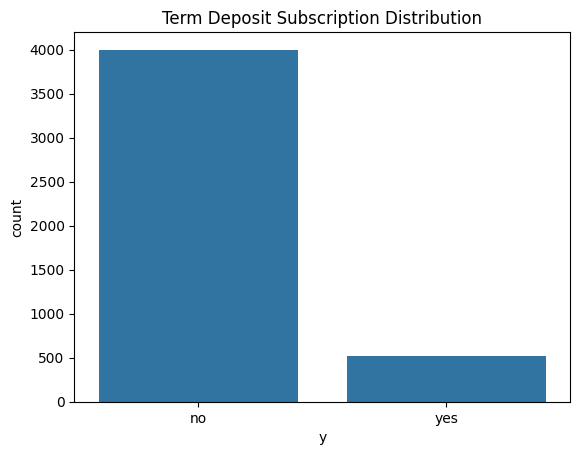

In [7]:
sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.show()


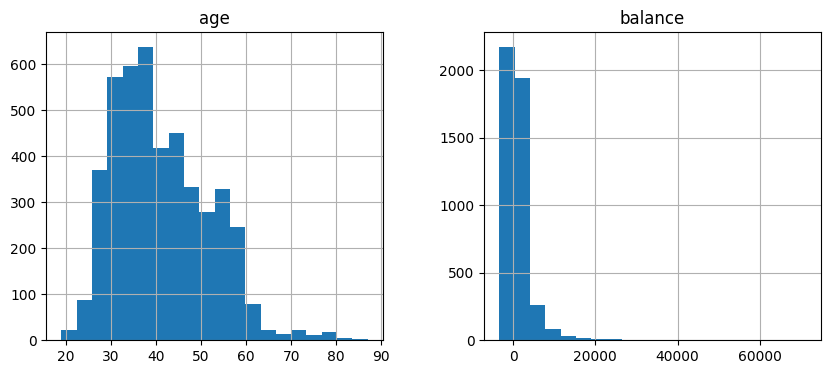

In [8]:
df[['age','balance']].hist(bins=20, figsize=(10,4))
plt.show()


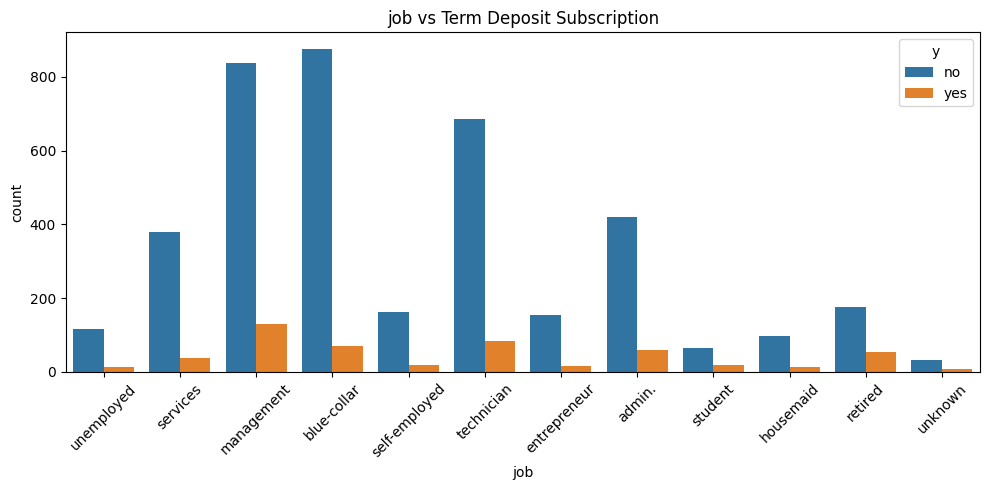

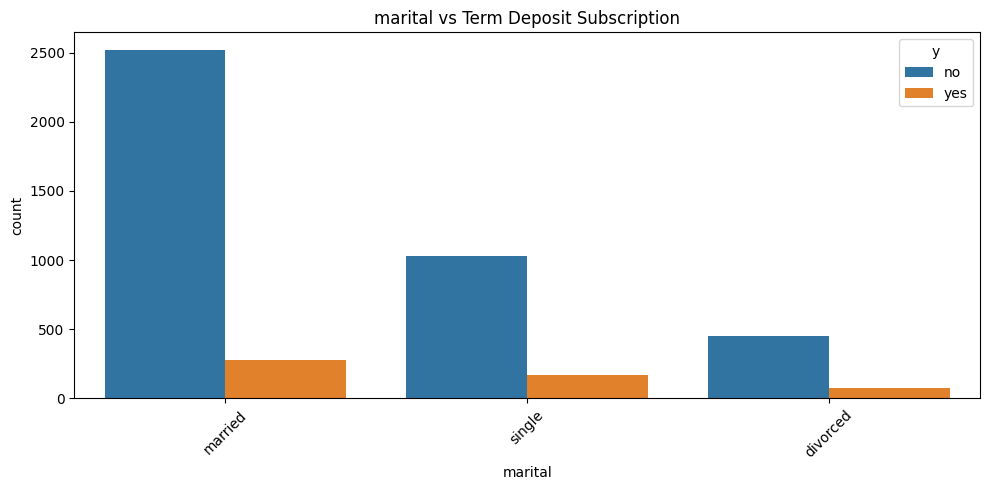

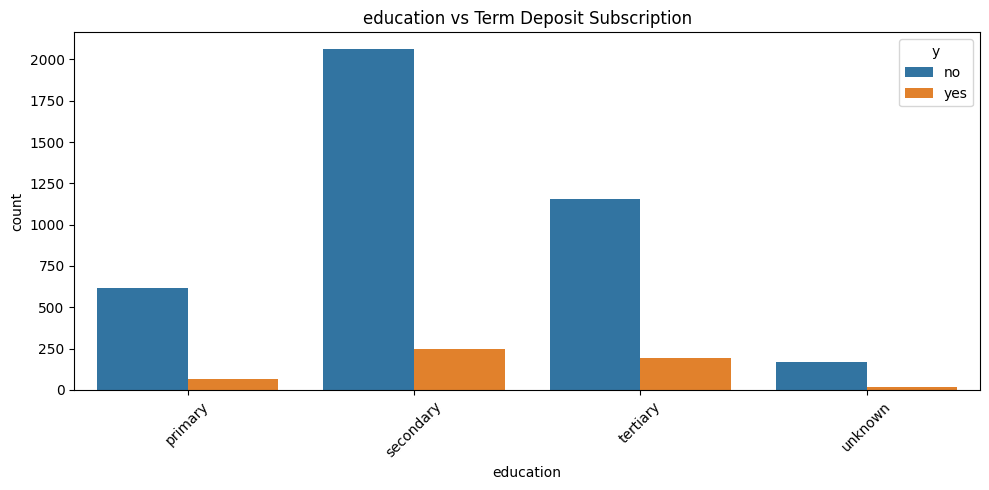

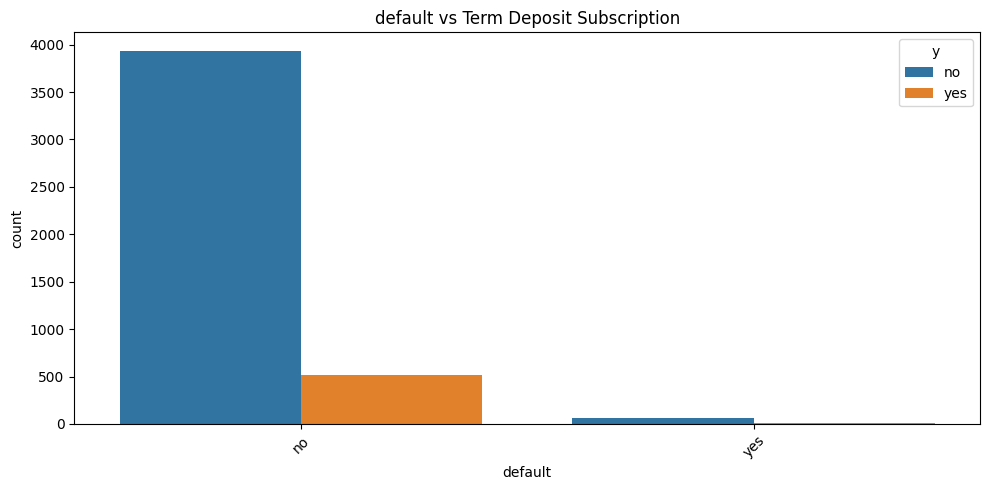

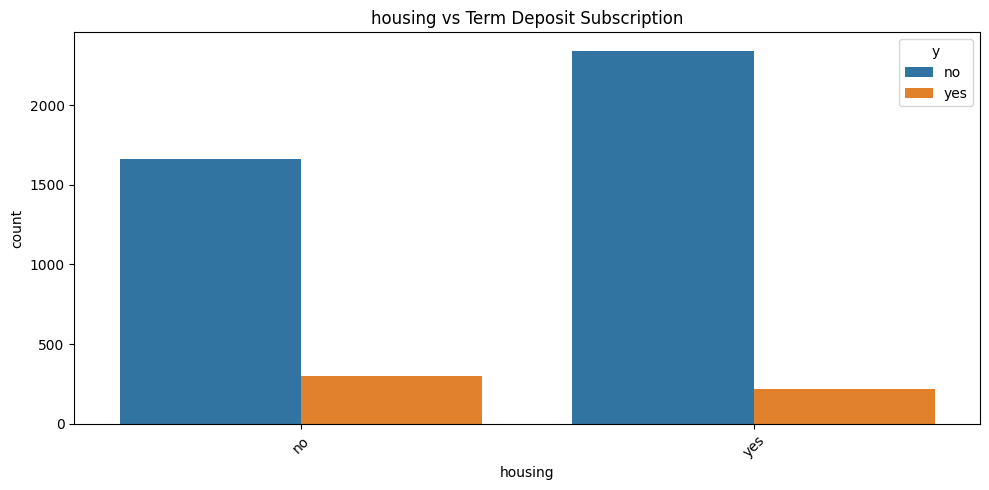

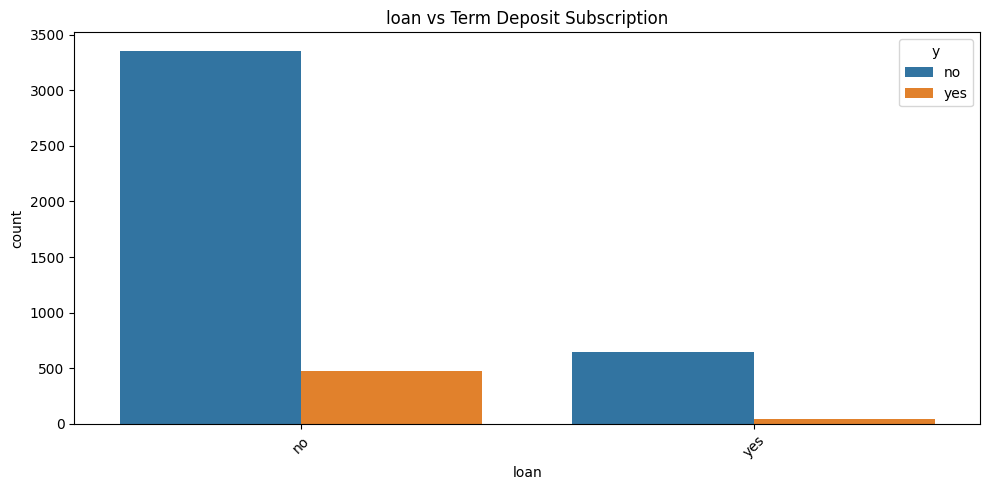

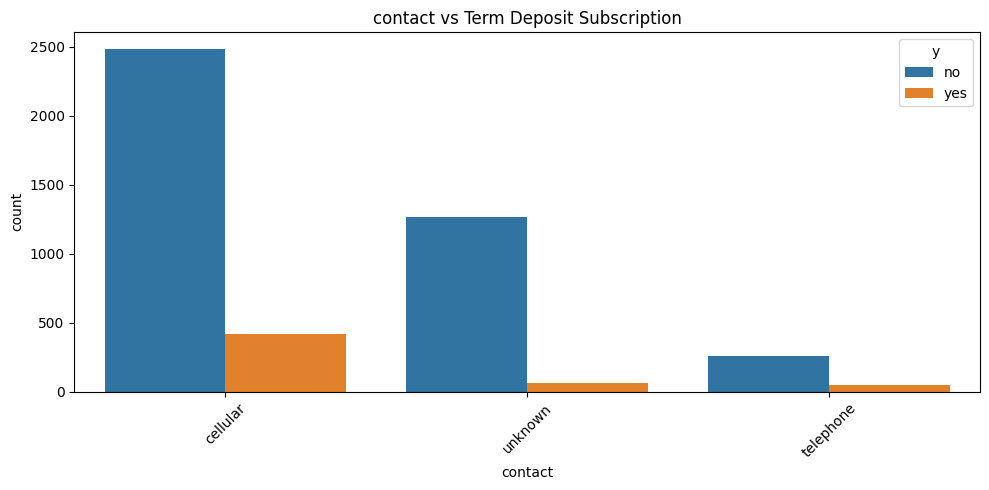

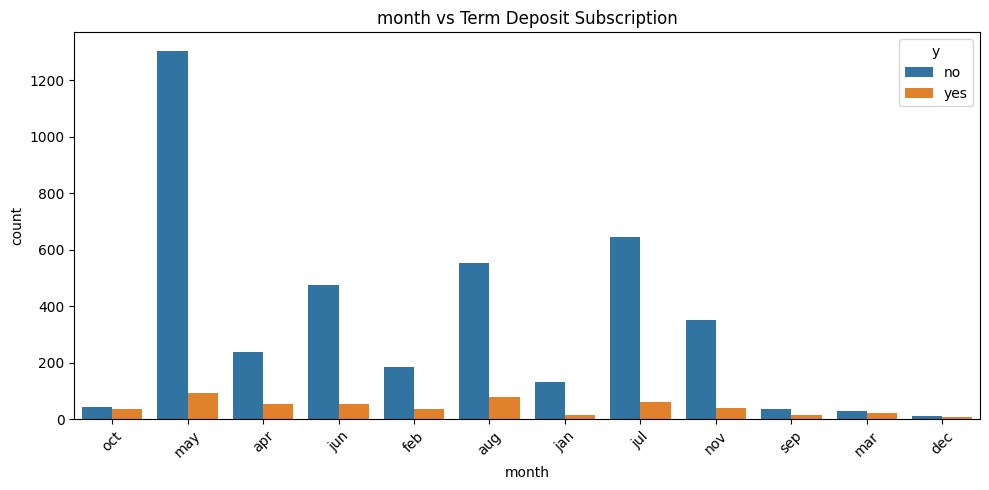

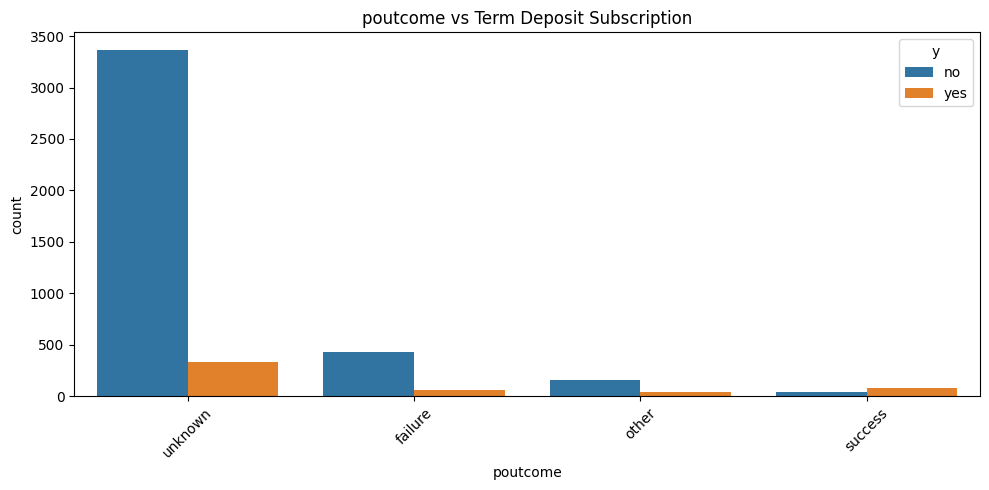

In [10]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"{col} vs Term Deposit Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
le = LabelEncoder()

# Encode target
df['y'] = le.fit_transform(df['y'])  # yes=1, no=0

# Encode all categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


Logistic Regression Accuracy: 0.8939226519337017
Random Forest Accuracy: 0.901657458563536


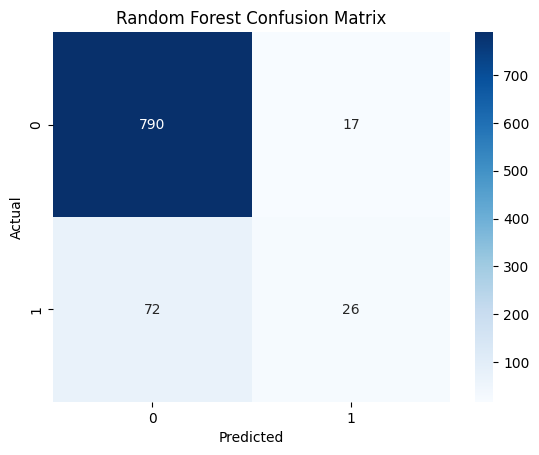

Random Forest F1-Score: 0.36879432624113473


In [15]:
# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# F1-Score
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))


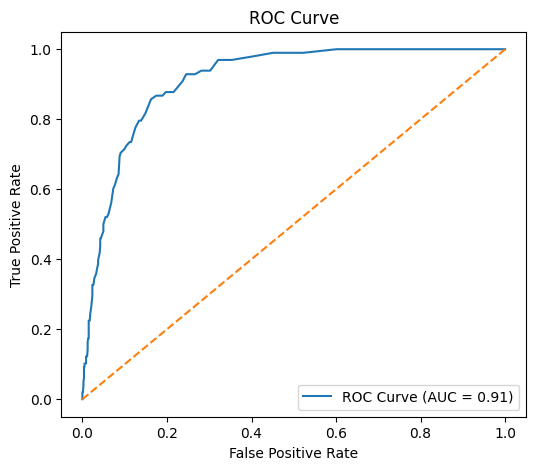

In [16]:
from sklearn.metrics import roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


 99%|===================| 1799/1810 [00:23<00:00]        

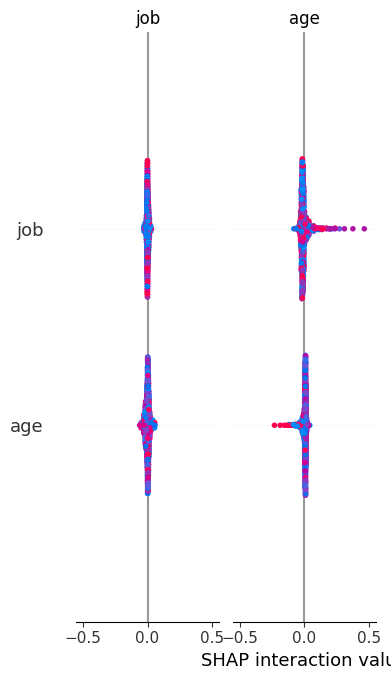

In [20]:
import shap

# Create SHAP explainer (use training data as background)
explainer = shap.Explainer(rf_model, X_train)

# Compute SHAP values for test set
shap_values = explainer(X_test)

# Use bar plot for easy visualization
shap.summary_plot(
    shap_values.values,  # SHAP values
    X_test,              # features
    feature_names=X_test.columns,
    plot_type="bar"      # <-- makes it simple bar chart
)
